The dataset used is from https://www.kaggle.com/rounakbanik/the-movies-dataset/version/7, it was prepared based on the data fields from The Movie Database (TMDb).
The EDA in general was refering mainly on the work done by https://www.kaggle.com/rounakbanik/the-story-of-film/notebook, the flow and few codes were gotten from there.

In [6]:
# data analysis and wrangling
import pandas as pd # To work with dataset
import numpy as np # Math Library
import random as rnd

#For the matplotlib graphs appear inline with our contents
%matplotlib inline
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

#Others
import scipy.stats as stats
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('input/movies_metadata.csv')
df.head(3)

adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   

     original_title                                           overview  ...  \
0         Toy Story  Led by Woody, Andy's toys live happily in his ...  ...   
1           Jumanji  When siblings Judy and Peter discover an encha...  ...   
2  Grumpier Old Men  A family wedding reignites the ancient feud be...  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count  
0          7.7     5415.0  
1          6.9     2413.0  
2          6.5       92.0  

[3 rows x 24 columns]

In [8]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

**Movies_metadata dataset's features explained: (source: https://www.kaggle.com/rounakbanik/the-story-of-film/notebook)**<br/><br/>
**adult:** Indicates if the movie is X-Rated or Adult.<br/>
**belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.<br/>
**budget:** The budget in which the movie was made in dollars.<br/>
**genre** The genre of the movie, Action, Comedy ,Thriller etc.<br/>
**homepage:** A link to the homepage of the movie.<br/>
**id** This is infact the movie_id as in the first dataset.<br/>
**imdb_id:** The IMDB ID of the movie.<br/>
**original_language:** The language in which the movie was originally shot in.<br/>
**original_title:** The original title of the movie.<br/>
**overview:** A brief blurb of the movie.<br/>
**popularity:** The Popularity Score assigned by TMDB.<br/>
**poster_path:** The URL of the poster image.<br/>
**production_companies:** A stringified list of production companies involved with the making of the movie.<br/>
**production_countries:** A stringified list of countries where the movie was shot/produced in.<br/>
**release_date:** Theatrical Release Date of the movie.<br/>
**revenue:** The total revenue of the movie in dollars.<br/>
**runtime:** The runtime of the movie in minutes.<br/>
**spoken_languages:** A stringified list of spoken languages in the film.<br/>
**status:** The status of the movie (Released, To Be Released, Announced, etc.)<br/>
**tagline:** The tagline of the movie.<br/>
**title:** The Official Title of the movie.<br/>
**video:** Indicates if there is a video present of the movie with TMDB.<br/>
**vote_average:** The average rating of the movie.<br/>
**vote_count:** The number of votes by users, as counted by TMDB.

In [9]:
df.shape

(45466, 24)

Let's understand and start cleaning our data

In [10]:
df.describe()

revenue       runtime  vote_average    vote_count
count  4.546000e+04  45203.000000  45460.000000  45460.000000
mean   1.120935e+07     94.128199      5.618207    109.897338
std    6.433225e+07     38.407810      1.924216    491.310374
min    0.000000e+00      0.000000      0.000000      0.000000
25%    0.000000e+00     85.000000      5.000000      3.000000
50%    0.000000e+00     95.000000      6.000000     10.000000
75%    0.000000e+00    107.000000      6.800000     34.000000
max    2.787965e+09   1256.000000     10.000000  14075.000000

In [11]:
#check for a null value
df.isnull().sum()

numerical = [f for f in df.columns if df.dtypes[f] != 'object']

categorical = [f for f in df.columns if df.dtypes[f] == 'object']
print("Numerical features:")
for i in range(len(numerical)):
    print(i+1, numerical[i])

print("\nCategorical features:")
for i in range(len(categorical)):
    print(i+1, categorical[i])

Numerical features:
1 revenue
2 runtime
3 vote_average
4 vote_count

Categorical features:
1 adult
2 belongs_to_collection
3 budget
4 genres
5 homepage
6 id
7 imdb_id
8 original_language
9 original_title
10 overview
11 popularity
12 poster_path
13 production_companies
14 production_countries
15 release_date
16 spoken_languages
17 status
18 tagline
19 title
20 video


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [13]:
#let's remove the imdb_id column as we already the movies id which are unique
df = df.drop('imdb_id', axis=1)

In [14]:
#and let's drop the original title as it is just the title from the main language the movie was shot into,
#for this analysis I will use the translated version only
df[df['original_title'] != df['title']][['title', 'original_title']].head()

title                    original_title
28  The City of Lost Children        La Cité des Enfants Perdus
29             Shanghai Triad                         摇啊摇，摇到外婆桥
32           Wings of Courage  Guillaumet, les ailes du courage
57                The Postman                        Il postino
58           The Confessional                  Le confessionnal

In [15]:
df.drop('original_title', axis=1, inplace=True)

In [16]:
#TODO: PLOT THE VALUES
#Lets which features has missing values
df.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
original_language           11
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [17]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count'],
      dtype='object')

In [18]:
#Let's check how much the revenue and budget ended up being zero 
revenue_zero=df[df['revenue'] == 0].shape
print("revenue is zero: ", revenue_zero)
budget_zero=df[df['budget'] == 0].shape
print("budget is zero: ", revenue_zero)

revenue is zero:  (38052, 22)
budget is zero:  (38052, 22)


This means that most movies has a revenue and a budget of zero, later on we will need this information. so we are replacing this the zero by NAN  that way we can fill it later.
Also, the budget was categorised as a categorical feature, meaning it has non numerical values, we are going to clean it too.

In [19]:
#replace zero values with nan
df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')

df['budget'] = df['budget'].replace(0, np.nan)

In [20]:
#now let's check how much null the budget feature has. it was 0 above
df[df['budget'].isnull()].shape

(36576, 22)

In [21]:
#let's get the return to each movies, this will help us to understand 
# if a movie was profitable or not
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape


(40085, 23)

In [22]:
df['return'].head(3)

0    12.451801
1     4.043035
2          NaN
Name: return, dtype: float64

In [23]:
# let's go through a few features and see which ones we can easily drop
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

as only a few movies are not categorized as adult, it will be safe to say that this feature will not teach us much

In [24]:
df = df.drop('adult', axis=1)

In [25]:
#get and print the most common titles
df['title'] = df['title'].astype('str')

In [26]:
title_corpus = ' '.join(df['title'])

How many top words do you wish to print?2
man : 665


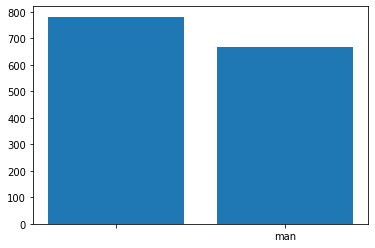

In [27]:
#source (https://medium.com/@agrimabahl/elegant-python-code-reproduction-of-most-common-words-from-a-story-25f5e28e0f8c)
import collections
import re
from wordcloud import WordCloud, STOPWORDS
file = title_corpus
stopwords= STOPWORDS
wordcount = collections.defaultdict(int)

pattern = r"\W"
for word in file.lower().split():
    word = re.sub(pattern, '', word)
    if word not in stopwords:
        wordcount[word] += 1
# printing most common words
to_print = int(input("How many top words do you wish to print?"))
#print(f"The most common {n} words are:")
# the next line sorts the default dict on the values in decreasing  # order and prints the first "to_print".
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:to_print] # this is continued from the previous assignment
for word, count in mc:
    if word:
      print(word, ":", count)    
    
# Draw the bart chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
if names:
    plt.bar(range(len(mc)),values,tick_label=names)
    plt.savefig('bar.png')
    plt.show()

In [28]:
#lets see which countries are more popular to have movies shoot at. (source:https://www.kaggle.com/rounakbanik/the-story-of-film/notebook)
import ast
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [29]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [30]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)


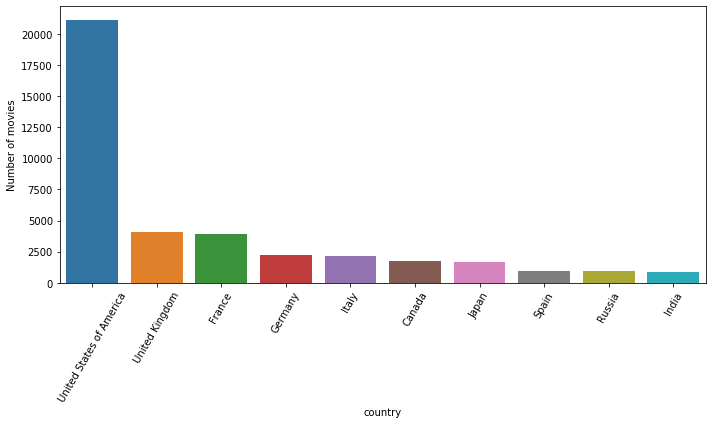

In [31]:
#TODO: GET the number of movies
top_country = con_df.head(10)

#plot the top 10 companies
plt.figure(figsize=(10,6))
bar = sns.barplot(x=top_country['country'],y=top_country['num_movies'],data=top_country)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of movies")
plt.tight_layout()

As the data shows, the United states is the most popural place to have movies shoot movies, in Europ Uk and France are the most dominant and in Asia Japan and India are the most popular places.

**Let's look at the production companies**

In [32]:
#fill null values
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [33]:
df['production_companies'].head()

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [34]:
#lets save the production companies data into a new dataframe
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [35]:
com_df = df.drop('production_companies', axis=1).join(s)

In [36]:
#source(https://www.kaggle.com/rounakbanik/the-story-of-film/notebook)
#get the total revenue
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
#get the average revenue
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
#get number of movies
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']
#create a new table with the new information
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [37]:
#print the top 10 production companies
com_pivot.sort_values('Total', ascending=False).head(10)

Total       Average  Number
Warner Bros.                            6.352519e+10  1.293792e+08     491
Universal Pictures                      5.525919e+10  1.193503e+08     463
Paramount Pictures                      4.880819e+10  1.235650e+08     395
Twentieth Century Fox Film Corporation  4.768775e+10  1.398468e+08     341
Walt Disney Pictures                    4.083727e+10  2.778046e+08     147
Columbia Pictures                       3.227974e+10  1.367785e+08     236
New Line Cinema                         2.217339e+10  1.119868e+08     198
Amblin Entertainment                    1.734372e+10  2.550547e+08      68
DreamWorks SKG                          1.547575e+10  1.984071e+08      78
Dune Entertainment                      1.500379e+10  2.419966e+08      62

In [38]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [39]:
df['year'].head()

0    1995
1    1995
2    1995
3    1995
4    1995
Name: year, dtype: object

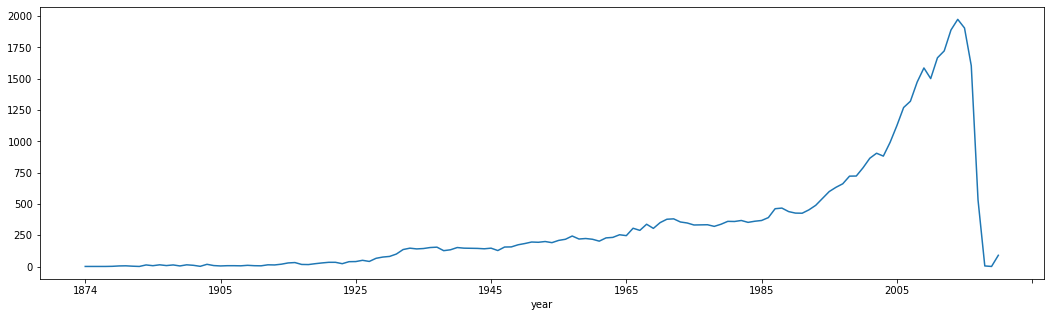

In [40]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

#df['decade'] = df['year'].copy()
#df['decade'] = pd.to_numeric(df['decade'], errors='coerce')
#df['decade'] =df['decade'].apply(lambda x:((x-1900)//10)*10)
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

This plot shows us that in years around 2000-2016 had the biggest number of movies and the year around 1874-1925 had the lowest. We are assuming that this sudden reduction in number around 2018 might have been caused by the fact that there were not much data in years around that time.  

**Heat map for movies created since 2000**
This heatmap will indicate movie releases by month and year for all movies released in this century. This will give us a good idea of the hot and cold months for movie buffs.
source:https://www.kaggle.com/rounakbanik/the-story-of-film/notebook

In [41]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

In [42]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [43]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [44]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)

ValueError: zero-size array to reduction operation minimum which has no identity

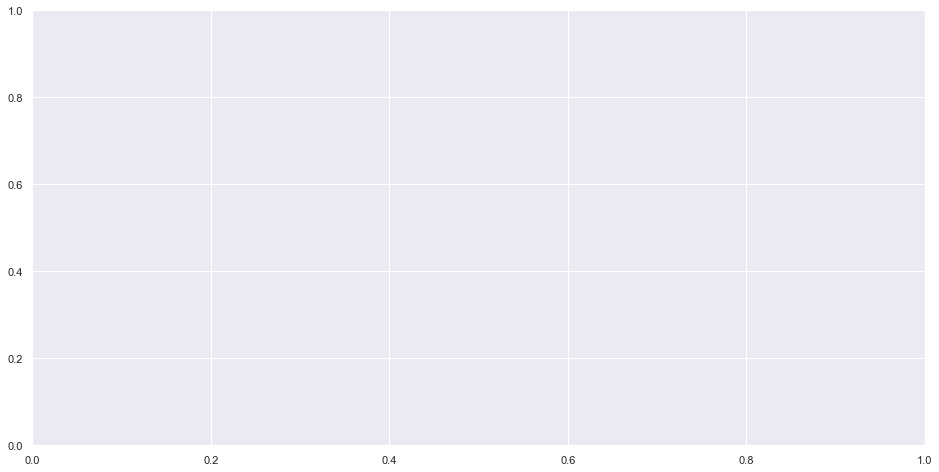

In [45]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

This heatmap shows that in year around 2011 to 2015 in months around December, November and October, weer the hotest time for movies realise. It also confirm our assumption above regarding movies realised around 2018 not having data. Also it shows that years around 2000-2003 has the coldest months especially in the Jun month.


In [46]:
#Let's checkout the movies runtime 
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

This data shows us that the longest movies run 1256 minutes(~20 hours) and the average movie length is 95 minutes(1hour and 35 min). as the majority of movies are less than 300 minutes, let's plot this.

In [47]:
df['runtime'] = df['runtime'].astype('float')

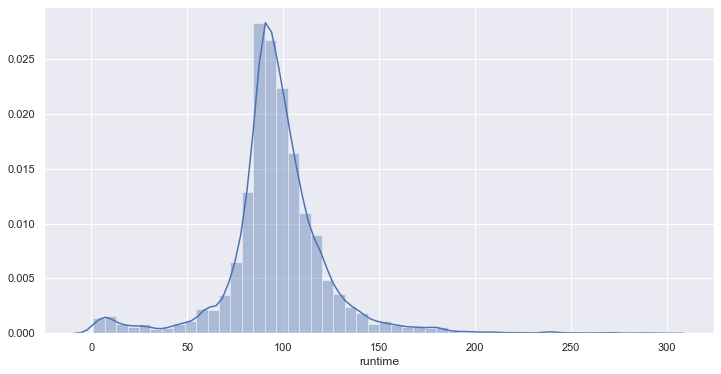

In [48]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

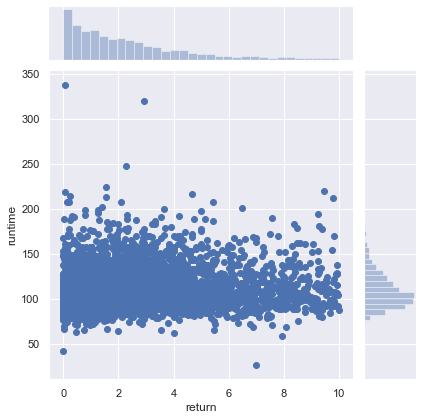

In [49]:
#Let's see if the movies length hav an impact to the overall return(benefit made)
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('return', 'runtime', data=df_mat)
plt.show()

It doesn't seems like there is a high impact between the movies and their length.

let's see if this will change if it was about budget. this means does a longet movie have a higher buget?

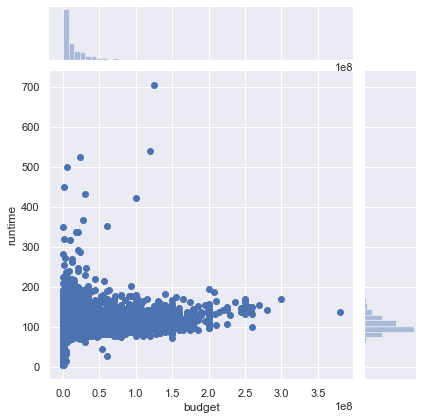

In [50]:
#Let's see if the movies length have an impact to the budget
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot('budget', 'runtime', data=df_mat)
plt.show()

This also shows that there isn't much impact in terms of budget and the movie length

In [51]:
#let's get an fei info about the budget
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

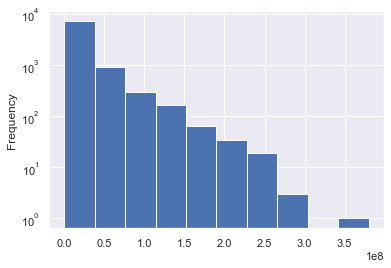

In [52]:
df['budget'].plot(logy=True, kind='hist')

This shows us that most movies has a budget around 25 millions dollars.

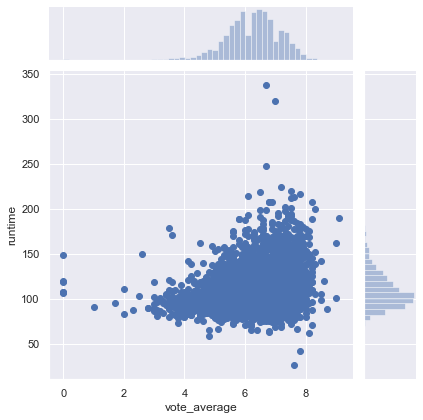

In [53]:
#Let's see if the movies length have an impact on audience ratings
df_mat = df[(df['vote_average'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot('vote_average', 'runtime', data=df_mat)
plt.show()

Here we can see that the movies tha last between 80 minutes and 170 min has the highest rating between 4/10-8/10. We also see that, movies that lasted more than 2 hours were more apreciated by the voters with a rating around 7/10.

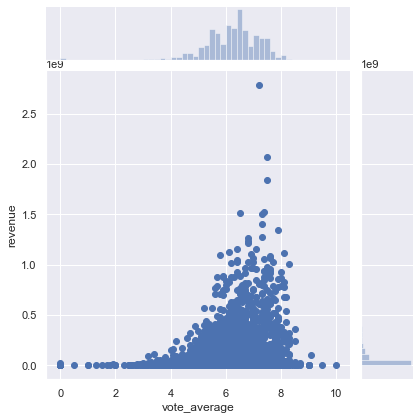

In [54]:
#Let's see if the moviesaudience ratings have an impact return
df_mat = df[(df['vote_average'].notnull()) & (df['revenue'] > 0)]
sns.jointplot('vote_average', 'revenue', data=df_mat)
plt.show()

This shows that the votes varies regardless of the revenue, and that the highest votes are for the movies with the lowest revenue while the movie with the highest revenue have about 7/10 voting.

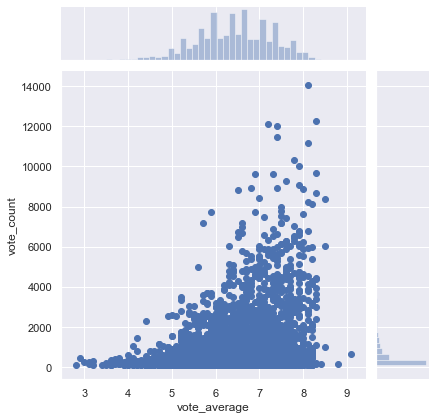

In [55]:
#let's see the number of votes according to the scores
df_mat = df[(df['vote_average'].notnull()) & (df['vote_count'].notnull())& (df['vote_count'] > 100)]
sns.jointplot('vote_average', 'vote_count', data=df_mat)
plt.show()

This shows that the more people liked the movies the more votes they gave it.

In [56]:
df.head(3)

belongs_to_collection      budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                NaN  65000000.0   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         NaN   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                               homepage     id original_language  \
0  http://toystory.disney.com/toy-story    862                en   
1                                   NaN   8844                en   
2                                   NaN  15602                en   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...    21.9469   
1  When siblings Judy and Peter discover an encha...    17.0155   
2  A family wedding reignites the ancient feud be...    11.7129   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   

                                production_companies  ...    status  \
0                          [Pixar Animation Studios]  ...  Released   
1  [TriStar Pictures, Teitler Film, Interscope Co...  ...  Released   
2                     [Warner Bros., Lancaster Gate]  ...  Released   

                                             tagline             title  video  \
0                                                NaN         Toy Story  False   
1          Roll the dice and unleash the excitement!           Jumanji  False   
2  Still Yelling. Still Fighting. Still Ready for...  Grumpier Old Men  False   

  vote_average vote_count     return  year day  month  
0          7.7     5415.0  12.451801  1995 NaN    NaN  
1          6.9     2413.0   4.043035  1995 NaN    NaN  
2          6.5       92.0        NaN  1995 NaN    NaN  

[3 rows x 25 columns]

In [57]:
import json

In [58]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [59]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [60]:
fran_pivot.sort_values('sum', ascending=False).head(10)

belongs_to_collection  count          mean           sum
552               Harry Potter Collection      8  9.634209e+08  7.707367e+09
1160                 Star Wars Collection      8  9.293118e+08  7.434495e+09
646                 James Bond Collection     26  2.733450e+08  7.106970e+09
1317  The Fast and the Furious Collection      8  6.406373e+08  5.125099e+09
968   Pirates of the Caribbean Collection      5  9.043154e+08  4.521577e+09
1550              Transformers Collection      5  8.732202e+08  4.366101e+09
325              Despicable Me Collection      4  9.227676e+08  3.691070e+09
1491              The Twilight Collection      5  6.684215e+08  3.342107e+09
610                    Ice Age Collection      5  6.433417e+08  3.216709e+09
666              Jurassic Park Collection      4  7.578710e+08  3.031484e+09

**Movie genres**

In [61]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [62]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [63]:
gen_df = df.drop('genres', axis=1).join(s)

In [ ]:
gen_df['genre'].value_counts().shape[0]

In [64]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

genre  movies
0            Drama   20265
1           Comedy   13182
2         Thriller    7624
3          Romance    6735
4           Action    6596
5           Horror    4673
6            Crime    4307
7      Documentary    3932
8        Adventure    3496
9  Science Fiction    3049

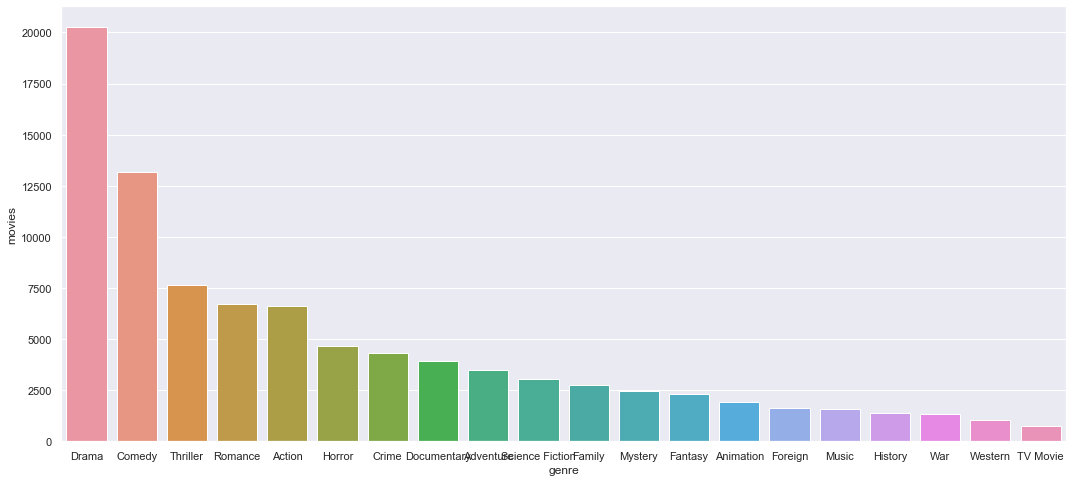

In [65]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(20))
plt.show()

This show us that the popular genres is drama, and the least popural is TV moies.

In [66]:
gen_df.head()

belongs_to_collection      budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                NaN  65000000.0   
1                                                NaN  65000000.0   

                               homepage    id original_language  \
0  http://toystory.disney.com/toy-story   862                en   
0  http://toystory.disney.com/toy-story   862                en   
0  http://toystory.disney.com/toy-story   862                en   
1                                   NaN  8844                en   
1                                   NaN  8844                en   

                                            overview popularity  \
0  Led by Woody, Andy's toys live happily in his ...    21.9469   
0  Led by Woody, Andy's toys live happily in his ...    21.9469   
0  Led by Woody, Andy's toys live happily in his ...    21.9469   
1  When siblings Judy and Peter discover an encha...    17.0155   
1  When siblings Judy and Peter discover an encha...    17.0155   

                        poster_path  \
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
0  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
1  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   

                                production_companies  \
0                          [Pixar Animation Studios]   
0                          [Pixar Animation Studios]   
0                          [Pixar Animation Studios]   
1  [TriStar Pictures, Teitler Film, Interscope Co...   
1  [TriStar Pictures, Teitler Film, Interscope Co...   

         production_countries  ...                                    tagline  \
0  [United States of America]  ...                                        NaN   
0  [United States of America]  ...                                        NaN   
0  [United States of America]  ...                                        NaN   
1  [United States of America]  ...  Roll the dice and unleash the excitement!   
1  [United States of America]  ...  Roll the dice and unleash the excitement!   

       title  video vote_average vote_count     return  year day  month  \
0  Toy Story  False          7.7     5415.0  12.451801  1995 NaN    NaN   
0  Toy Story  False          7.7     5415.0  12.451801  1995 NaN    NaN   
0  Toy Story  False          7.7     5415.0  12.451801  1995 NaN    NaN   
1    Jumanji  False          6.9     2413.0   4.043035  1995 NaN    NaN   
1    Jumanji  False          6.9     2413.0   4.043035  1995 NaN    NaN   

       genre  
0  Animation  
0     Comedy  
0     Family  
1  Adventure  
1    Fantasy  

[5 rows x 25 columns]

In [67]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']

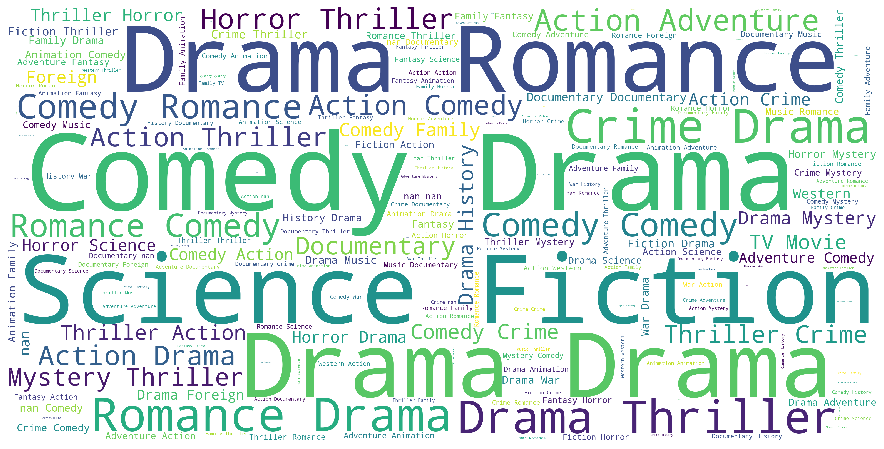

In [68]:
#over all visiualisation of the genre of the movie
gen_df['genre'] = gen_df['genre'].astype('str')
genre_corpus = ' '.join(gen_df['genre'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(genre_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()


**Cast and Crew**<br/><br/>
This is part of the credit dataset. 
The first step is to make sure that the data has the right format and that the ID has the right format. the overall code used for the preping part is from :https://www.kaggle.com/rounakbanik/the-story-of-film/notebook

In [69]:
#get the credits dataset
credits_df = pd.read_csv('input/credits.csv')
credits_df.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [70]:
#perform an integer conversion of our IDs and if an exception is raised,
#we will replace the ID with NaN
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [71]:
df['id'] = df['id'].apply(convert_int)

In [72]:
df[df['id'].isnull()]

belongs_to_collection  budget  \
19730              0.065736     NaN   
29503              1.931659     NaN   
35587              2.185485     NaN   

                                                  genres  \
19730  [Carousel Productions, Vision View Entertainme...   
29503  [Aniplex, GoHands, BROSTA TV, Mardock Scramble...   
35587  [Odyssey Media, Pulser Productions, Rogue Stat...   

                                                homepage  id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso... NaN   
29503  [{'iso_3166_1': 'US', 'name': 'United States o... NaN   
35587           [{'iso_3166_1': 'CA', 'name': 'Canada'}] NaN   

      original_language  overview             popularity  \
19730             104.0  Released                    NaN   
29503              68.0  Released                    NaN   
35587              82.0  Released  Beware Of Frost Bites   

                               poster_path production_companies  ... status  \
19730                         Midnight Man                   []  ...    NaN   
29503  Mardock Scramble: The Third Exhaust                   []  ...    NaN   
35587                     Avalanche Sharks                   []  ...    NaN   

      tagline  title  video vote_average vote_count return year day  month  
19730     NaN    nan    NaN          NaN        NaN    NaN  NaT NaN    NaN  
29503     NaN    nan    NaN          NaN        NaN    NaN  NaT NaN    NaN  
35587     NaN    nan    NaN          NaN        NaN    NaN  NaT NaN    NaN  

[3 rows x 25 columns]

In [73]:
df = df.drop([19730, 29503, 35587])

In [74]:
#the id as int
df['id'] = df['id'].astype('int')

In [75]:
#put together the 2 dataframes
df = df.merge(credits_df, on='id')
df.shape

(45538, 27)

In [76]:
#mak it to the right format
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [77]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [78]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [79]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [80]:
df['director'] = df['crew'].apply(get_director)

In [81]:
#change the cast column name to be the actor
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

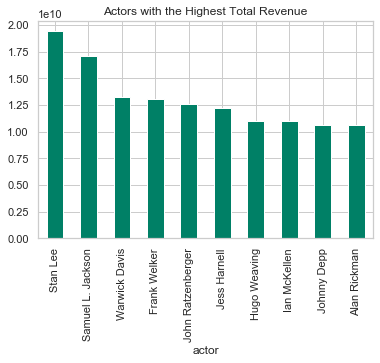

In [82]:
#Actors who worked on the Highest Total Revenue movies
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='summer')
plt.show()

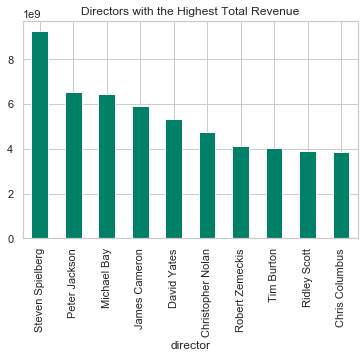

In [83]:
#Directors who worked on the Highest Total Revenue movies
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='summer')
plt.show()

In [84]:
#lets check out the actors who acted or directors who directed in 5 movies or more (source: https://www.kaggle.com/rounakbanik/the-story-of-film/notebook)
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

In [85]:
#let's which actor is the most successfull
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

return
actor                          
Jami Gertz         3.099099e+06
Donna Mitchell     2.479289e+06
Andrew McCarthy    2.479280e+06
Nicholas Pryor     1.770914e+06
James Spader       1.549551e+06
Michael Bowen      1.033038e+06
Robert Downey Jr.  5.165189e+05
Martin Kove        3.395458e+05
William Zabka      3.395441e+05
Brad Pitt          2.817390e+05

In [86]:
#let's which director is the most successfull
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

return
director                       
John G. Avildsen  169822.750468
George A. Romero      60.656935
George Lucas          54.328446
Martha Coolidge       49.553131
Davis Guggenheim      46.243000
George Miller         39.076975
James Wan             27.659835
Guy Hamilton          25.779057
John Badham           25.433532
John Carpenter        25.075058

Director John G. Avildsen shows that he has the highest return, but this was mainly that there was a movie(The Karate Kid, Part II) which cost 113$ while it cost about 13 million dollars in reality, this was just an error.

In [87]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

title      budget      revenue        return  year
1853                    Rocky   1000000.0  117235147.0  1.172351e+02  1976
2307                  Rocky V  42000000.0  119946358.0  2.855866e+00  1990
2315           The Karate Kid   8000000.0   90815558.0  1.135194e+01  1984
2316  The Karate Kid, Part II       113.0  115103979.0  1.018619e+06  1986
5226                      Joe    106000.0   19319254.0  1.822571e+02  1970
5658                Neighbors   8500000.0   29916207.0  3.519554e+00  1981

In [88]:
#Let's drop a few column
df = df.drop(['homepage', 'poster_path', 'crew_x','crew_y', 'original_language' ], axis=1)
df.head()

KeyError: "['crew_x' 'crew_y'] not found in axis"

# 1. Demographic Recommendation

In [89]:
movies = df.copy()
movies.head()

belongs_to_collection      budget  \
0  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000.0   
1                                                NaN  65000000.0   
2  {'id': 119050, 'name': 'Grumpy Old Men Collect...         NaN   
3                                                NaN  16000000.0   
4  {'id': 96871, 'name': 'Father of the Bride Col...         NaN   

                         genres                              homepage     id  \
0   [Animation, Comedy, Family]  http://toystory.disney.com/toy-story    862   
1  [Adventure, Fantasy, Family]                                   NaN   8844   
2             [Romance, Comedy]                                   NaN  15602   
3      [Comedy, Drama, Romance]                                   NaN  31357   
4                      [Comedy]                                   NaN  11862   

  original_language                                           overview  \
0                en  Led by Woody, Andy's toys live happily in his ...   
1                en  When siblings Judy and Peter discover an encha...   
2                en  A family wedding reignites the ancient feud be...   
3                en  Cheated on, mistreated and stepped on, the wom...   
4                en  Just when George Banks has recovered from his ...   

  popularity                       poster_path  \
0    21.9469  /rhIRbceoE9lR4veEXuwCC2wARtG.jpg   
1    17.0155  /vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg   
2    11.7129  /6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg   
3    3.85949  /16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg   
4    8.38752  /e64sOI48hQXyru7naBFyssKFxVd.jpg   

                                production_companies  ... vote_count  \
0                          [Pixar Animation Studios]  ...     5415.0   
1  [TriStar Pictures, Teitler Film, Interscope Co...  ...     2413.0   
2                     [Warner Bros., Lancaster Gate]  ...       92.0   
3           [Twentieth Century Fox Film Corporation]  ...       34.0   
4       [Sandollar Productions, Touchstone Pictures]  ...      173.0   

      return  year  day month  \
0  12.451801  1995  NaN   NaN   
1   4.043035  1995  NaN   NaN   
2        NaN  1995  NaN   NaN   
3   5.090760  1995  NaN   NaN   
4        NaN  1995  NaN   NaN   

                                                cast  \
0  [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...   
1  [Robin Williams, Jonathan Hyde, Kirsten Dunst,...   
2  [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...   
3  [Whitney Houston, Angela Bassett, Loretta Devi...   
4  [Steve Martin, Diane Keaton, Martin Short, Kim...   

                                                crew cast_size crew_size  \
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...        13       106   
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...        26        16   
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...         7         4   
3  [{'credit_id': '52fe44779251416c91011acb', 'de...        10        10   
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...        12         7   

          director  
0    John Lasseter  
1     Joe Johnston  
2    Howard Deutch  
3  Forest Whitaker  
4    Charles Shyer  

[5 rows x 30 columns]

### Using IMDB's weighted rating (wr) which is given as : 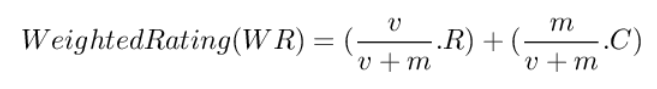

In [90]:
C = movies['vote_average'].mean()
m = movies['vote_count'].quantile(0.9)
print('Mean Vote: \nC = ' + str(C))
print('Minimum Votes Required: \nm = ' + str(m))

Mean Vote: 
C = 5.618232129131436
Minimum Votes Required: 
m = 160.0


### Filter out movies with low votes

In [91]:
f_movies = movies.copy().loc[movies['vote_count'] >= m]
f_movies.shape

(4563, 30)

### Defining weighted_rating Function

In [92]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

### Adding a new column by applying the formula

In [93]:
f_movies['score'] = f_movies.apply(weighted_rating, axis=1)

## 1.1 Top 10 movies based on IMDB rating 

In [94]:
#Sort movies
f_movies = f_movies.sort_values('score', ascending=False)

#Print the top 10 movies
f_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average     score
314       The Shawshank Redemption      8358.0           8.5  8.445870
837                  The Godfather      6024.0           8.5  8.425439
10345  Dilwale Dulhania Le Jayenge       661.0           9.1  8.421458
12525              The Dark Knight     12269.0           8.3  8.265477
2854                    Fight Club      9678.0           8.3  8.256385
292                   Pulp Fiction      8670.0           8.3  8.251406
522               Schindler's List      4436.0           8.3  8.206640
23742                     Whiplash      4376.0           8.3  8.205405
5501                 Spirited Away      3968.0           8.3  8.196056
2219             Life Is Beautiful      3643.0           8.3  8.187173

## 1.2 Top 10 movies based on Vote Average

In [95]:
#Sort movies
f_movies = f_movies.sort_values('vote_average', ascending=False)

#Print the top 10 movies
f_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average     score
10345      Dilwale Dulhania Le Jayenge       661.0           9.1  8.421458
39163                     Planet Earth       176.0           8.8  7.284872
314           The Shawshank Redemption      8358.0           8.5  8.445870
837                      The Godfather      6024.0           8.5  8.425439
40328                       Your Name.      1030.0           8.5  8.112535
1187            The Godfather: Part II      3418.0           8.3  8.180077
44752    Black Mirror: White Christmas       211.0           8.3  7.143442
1193       Once Upon a Time in America      1104.0           8.3  7.960536
1161   One Flew Over the Cuckoo's Nest      3001.0           8.3  8.164257
1185                            Psycho      2405.0           8.3  8.132716

## 1.3 Top 10 movies based on Vote Count

In [96]:
#Sort movies
f_movies = f_movies.sort_values('vote_count', ascending=False)

#Print the top 10 movies
f_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

title  vote_count  vote_average     score
15545                Inception     14075.0           8.1  8.072105
12525          The Dark Knight     12269.0           8.3  8.265477
14617                   Avatar     12114.0           7.2  7.179381
17890             The Avengers     12000.0           7.4  7.376556
26649                 Deadpool     11444.0           7.4  7.375432
22950             Interstellar     11187.0           8.1  8.065005
20128         Django Unchained     10297.0           7.8  7.766617
23822  Guardians of the Galaxy     10014.0           7.9  7.864116
2854                Fight Club      9678.0           8.3  8.256385
18316         The Hunger Games      9634.0           6.9  6.879060

## 1.4 Top 10 movies based on Vote Count & Average

In [97]:
f_movies['vote_average_count'] = f_movies['vote_count'] * f_movies['vote_average']


In [98]:
#Sort movies
f_movies = f_movies.sort_values('vote_average_count', ascending=False)

#Print the top 10 movies
f_movies[['title', 'vote_count', 'vote_average', 'score', 'vote_average_count']].head(10)

title  vote_count  vote_average     score  \
15545                Inception     14075.0           8.1  8.072105   
12525          The Dark Knight     12269.0           8.3  8.265477   
22950             Interstellar     11187.0           8.1  8.065005   
17890             The Avengers     12000.0           7.4  7.376556   
14617                   Avatar     12114.0           7.2  7.179381   
26649                 Deadpool     11444.0           7.4  7.375432   
2854                Fight Club      9678.0           8.3  8.256385   
20128         Django Unchained     10297.0           7.8  7.766617   
23822  Guardians of the Galaxy     10014.0           7.9  7.864116   
292               Pulp Fiction      8670.0           8.3  8.251406   

       vote_average_count  
15545            114007.5  
12525            101832.7  
22950             90614.7  
17890             88800.0  
14617             87220.8  
26649             84685.6  
2854              80327.4  
20128             80316.6  
23822             79110.6  
292               71961.0

# 3. Collaborative Filtering

## 3.1 Similar Movies Using Corrolation

In [99]:
import pandas as pd
import numpy as np
from surprise import Reader, Dataset, SVD, accuracy, NMF, SVDpp, SlopeOne, NormalPredictor, KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore, BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
reader = Reader()


In [100]:
r_cols = ['userId', 'movieId', 'rating']
ratings = pd.read_csv('the-movies-dataset/ratings_small.csv', usecols=r_cols, encoding="ISO-8859-1")

m_cols = ['id', 'title']
movies = pd.read_csv('the-movies-dataset/movies_metadata.csv', usecols=m_cols, encoding="ISO-8859-1")
movies.columns = ['movieId', 'title']
movies['movieId'] = pd.to_numeric(movies['movieId'], errors='coerce')

ratings = pd.merge(ratings, movies)
ratings.head()

FileNotFoundError: [Errno 2] No such file or directory: 'the-movies-dataset/ratings_small.csv'

### Counting how many ratings exist for each movie, and also the average rating

In [ ]:
movieStats = ratings.groupby('title').agg({'rating': [np.size, np.mean]})
movieStats.head()

### For a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list

In [ ]:
m= movieStats['rating']['size'].quantile(0.9)
m

### Getting rid of any movies rated by fewer than m people, and check the top-rated ones that are left:

In [ ]:
popularMovies = movieStats['rating']['size'] >= m
movieStats[popularMovies].sort_values([('rating', 'mean')], ascending=False)[:15]

### Users who rated Terminator:

In [ ]:
TerminatorRatings = movieRatings['Terminator 3: Rise of the Machines']
TerminatorRatings.dropna().head()

### Pandas' corrwith function to compute the pairwise correlation of Terminator' vector of user rating with every other movie! After that, we'll drop any results that have no data, and construct a new DataFrame of movies and their correlation score (similarity) to Terminator:

In [ ]:
similarMovies = movieRatings.corrwith(TerminatorRatings)
similarMovies = similarMovies.dropna()
df = pd.DataFrame(similarMovies)
df.head(10)

### Joining this data with our original set of similar movies to Terminator:

In [ ]:
df = movieStats[popularMovies].join(pd.DataFrame(similarMovies, columns=['similarity']))
df.head()

### Sorting by similarity score

In [ ]:
df.sort_values(['similarity'], ascending=False)[:15]

## 3.2 Using Surprise Library

In [ ]:
ratings = pd.read_csv('the-movies-dataset/ratings_small.csv')
ratings.head()

### Load the  dataset

data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

## 3.2.1 SVD algorithm

In [ ]:
algo = SVD()

### Run 5-fold cross-validation and print results

In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Retrieve the trainset and train it

In [ ]:
trainset = data.build_full_trainset()
algo.fit(trainset)

### Get all ratings from user 1

In [ ]:
ratings[ratings['userId'] == 1]

### We can now predict ratings by directly calling the predict() method on user 1 and item 1371, and the true rating r_ui=2.5

In [ ]:
algo.predict(1, 1371, 2.5)

### We got an estimate of 2.726 which is close to real rating of 2.5

## 3.2.2 NMF algorithm

In [ ]:
algo = NMF()

### Run 5-fold cross-validation and print results

In [ ]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Retrieve the trainset and train it

In [ ]:
trainset = data.build_full_trainset()
algo.fit(trainset)

### We can now predict ratings by directly calling the predict() method on user 1 and item 1371, and the true rating r_ui=2.5

In [ ]:
algo.predict(1, 1371, 2.5)

### We got an estimate of 1.878, close to real rating of 2.5 but not as close as SVD algorithm

## 3.2.3 All algorithms

In [ ]:
benchmark = []

# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)    

    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)    

pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse') 

### Let's now try to run the algorithm that gave us the best result SVD++

In [ ]:
algo = SVDpp()

### Run 3-fold cross-validation and print results

In [ ]:
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=True)

### Retrieve the trainset and train it

In [ ]:
trainset = data.build_full_trainset()
algo.fit(trainset)

### We can now predict ratings by directly calling the predict() method on user 1 and item 1371, and the true rating r_ui=2.5

In [ ]:
algo.predict(1, 1371, 2.5)

### We got an estimate of 2.305, the closest we got to real rating of 2.5

## 3.2.4 Get all predictions from BaselinOnly

In [ ]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)

### Retrieve the trainset and train it

In [ ]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

### Get all predictions

In [ ]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

## Top 10 Best Predictions

In [ ]:
best_predictions

## Top 10 Worst Predictions

In [ ]:
worst_predictions

### Investigating a value in the worst predictions chart

In [ ]:
import matplotlib.pyplot as plt
%matplotlib notebook
ratings[ratings['movieId'] == 924]['rating'].hist()
plt.xlabel('rating')
plt.ylabel('Number of ratings')
plt.title('Number of ratings movie 924 has received')
plt.show();

### Most users rated this movie between 4 and 5, thus our prediction came as 4.79. Hence the rating here of 0.5 is most likely to be an outlier

In [ ]:
movies.head()

## Content Based 

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [ ]:
df = pd. read_csv('input/the-movies-dataset/movies_metadata.csv')
df.head()

In [104]:
df['production'] = df['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df['genres'] = df['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [105]:
features=['overview','tagline']
for feature in features:
    df[feature] = df[feature].fillna('')

In [106]:
df['description'] = df['overview'] + df['tagline']

In [107]:
#prepare small data
links_small = pd.read_csv('input/the-movies-dataset/links_small.csv')
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')

In [108]:
for i, item in enumerate(df['id']):
   try:
      int(item)
   except ValueError:
      print('ERROR at index {}: {!r}'.format(i, item))

ERROR at index 19730: '1997-08-20'
ERROR at index 29503: '2012-09-29'
ERROR at index 35587: '2014-01-01'


In [109]:
df = df.drop([19730,29503,35587])

In [110]:
df['id'] = df['id'].astype('int')

In [111]:
sdf = df[df['id'].isin(links_small)]
sdf.shape

(9099, 26)

In [114]:
vectorizer  = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sdf['description'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [115]:
# create map (title, index)
indices = pd.Series(sdf.index, index=sdf['title']).drop_duplicates()

In [116]:
def get_recommendations_desc (title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10]
    movie_indices = [i[0] for i in sim_scores]
    return sdf['title'].iloc[movie_indices]

In [117]:
get_recommendations_desc('Sense and Sensibility')

10545         Pride & Prejudice
5316           Lovely & Amazing
4613              Tortilla Soup
7337        Pride and Prejudice
11270      The Science of Sleep
11559         Because I Said So
9561        The Upside of Anger
27868    People, Places, Things
1659                  Senseless
Name: title, dtype: object

## keywords 

In [118]:
kw_df = pd. read_csv('input/the-movies-dataset/keywords.csv')
kw_df.head()

id                                           keywords
0    862  [{'id': 931, 'name': 'jealousy'}, {'id': 4290,...
1   8844  [{'id': 10090, 'name': 'board game'}, {'id': 1...
2  15602  [{'id': 1495, 'name': 'fishing'}, {'id': 12392...
3  31357  [{'id': 818, 'name': 'based on novel'}, {'id':...
4  11862  [{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...

In [119]:
kw_df['keywords'] = kw_df['keywords'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [120]:
cr_df = pd. read_csv('input/the-movies-dataset/credits.csv')
cr_df.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [121]:
cr_df['actor'] = cr_df['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [122]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [123]:
cr_df['crew'] = cr_df['crew'].apply(literal_eval)
cr_df['director'] = cr_df['crew'].apply(get_director)

In [124]:
kw_df['id'] = kw_df['id'].astype('int')
cr_df['id'] = cr_df['id'].astype('int')
df['id'] = df['id'].astype('int')

In [125]:
df = df.merge(cr_df, on='id')
df = df.merge(kw_df, on='id')

In [126]:
sdf = df[df['id'].isin(links_small)]
sdf.shape

(9219, 31)

In [127]:
sdf['actor'] = sdf['actor'].apply(lambda x: [str.lower(i.replace(" ", "")) for i in x])
sdf['director'] = sdf['director'].astype('str').apply(lambda x: str.lower(x.replace(" ", "")))

In [128]:
sdf['soup'] = sdf['keywords'] + sdf['actor'] + sdf['genres'] 
sdf['soup'] = sdf['soup'].apply(lambda x: ' '.join(x))

In [129]:
vectorizer1  = TfidfVectorizer(ngram_range=(1, 2) , min_df=0, stop_words="english")
tfidf_matrix1 = vectorizer1.fit_transform(sdf['soup'])

cos_sim = linear_kernel(tfidf_matrix1, tfidf_matrix1)

In [131]:
def get_recommendations_keywords (title):
##try: 
    idx = indices[title]
    sim_scores = list(enumerate(cos_sim[idx]))     
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:10]
    movie_indices = [i[0] for i in sim_scores]
    #print (movie_indices)
    return sdf.iloc[movie_indices,[20,6]]
##except:
  ##  print (title \" is not in database.")  


In [132]:
get_recommendations_keywords('Mean Girls')

title    imdb_id
13105             Dead Leaves  tt0439533
911     2001: A Space Odyssey  tt0062622
5324           Silent Running  tt0067756
31096  Ghost in the Shell 2.0  tt1260502
3888              The 6th Day  tt0216216
1201          A Grand Day Out  tt0104361
1618        Starship Troopers  tt0120201
7527                   Zardoz  tt0070948
3650               Titan A.E.  tt0120913

In [ ]:
#  10 most similar movies based on the cosine similarity score.
from flask import Flask
from flask import request
import simplejson as json
app = Flask(__name__)

@app.route("/")
def main():
    title = request.args.get('movie')
    print("title",title)
    idx = indices[title]
    print("Index",idx)
    similar_scores = list(enumerate(cos_sim[idx]))

    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:11]
    movie_indices = [i[0] for i in similar_scores]
        
    output = []
    for item in sdf.iloc[movie_indices]:
        output.append(item)
    return json.dumps(output)
if __name__ == "__main__":
    app.run()